Add dependencies.

In [72]:
import warnings
warnings.filterwarnings('ignore')

import math 
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.integrate as integrate

Set a rolling window size of 30, and read 1-minute intraday OHLC bar data from a single trading day.

In [73]:
window_size = 30
ohlc = pd.read_csv('./data/TLT_sample.csv')

Compute log close prices.

In [74]:
closes = np.log(ohlc['marketClose'])

Create a lambda function which generates a rolling integral of the series.

In [75]:
rolling_integral = lambda series: [ integrate.simps(series[X - window_size: X], even='first') for X in range(window_size, int(len(series))) ]

Integrate the series and visualize the results. 

In [76]:
integrated = rolling_integral(closes)

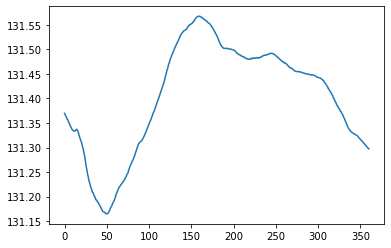

In [77]:
sns.lineplot(data=integrated)
plt.show()

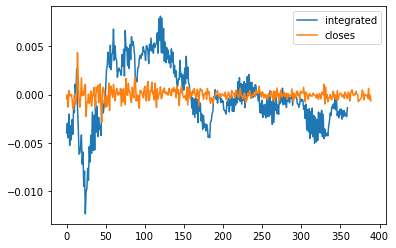

In [78]:
sns.lineplot(data=np.diff(integrated), label='integrated')
sns.lineplot(data=np.diff(closes), label='closes')
plt.legend()
plt.show()

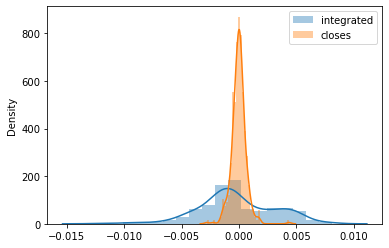

In [79]:
sns.distplot(np.diff(integrated), label='integrated')
sns.distplot(np.diff(closes), label='closes')
plt.legend()
plt.show()